In [20]:
%matplotlib inline

In [21]:
from non_dominated_surface import compute_non_dominated_surface
from build_model import build_model, get_instance
import matplotlib.pyplot as plt
from matplotlib import cm
import os

In [22]:
instance_filename = "toy_instance.json"
data = get_instance(instance_filename)
model = build_model(data)
non_dominated_models = compute_non_dominated_surface(model, data)

5
2.0
1.0
0.0
Set parameter LogToConsole to value 1


In [23]:
# Saving results
os.makedirs("results", exist_ok=True)
f = open(os.path.join("results", f"{instance_filename.split('.')[0]}_complete.txt"), "w+")
f.write(str(non_dominated_models))
f.close()

In [24]:
def get_objective_value(models, max_duration, max_assigned):
    for model in models : 
        if model["max_duration"] == max_duration and model["max_assigned"] == max_assigned : 
            return model["objVal"]
    return 0 #ValueError("value not found")

3.0 2.0
3.0 1.0
-0.0 0.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
2.0 1.0
-0.0 0.0
1.0 4.0
1.0 3.0
1.0 2.0
1.0 1.0
-0.0 0.0
0.0 -0.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
2.0 1.0
-0.0 0.0
1.0 4.0
1.0 3.0
1.0 2.0
1.0 1.0
-0.0 0.0
0.0 -0.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
2.0 1.0
-0.0 0.0
1.0 4.0
1.0 3.0
1.0 2.0
1.0 1.0
-0.0 0.0
0.0 -0.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
2.0 1.0
-0.0 0.0
1.0 4.0
1.0 3.0
1.0 2.0
1.0 1.0
-0.0 0.0
0.0 -0.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
2.0 1.0
-0.0 0.0
1.0 4.0
1.0 3.0
1.0 2.0
1.0 1.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
2.0 1.0
-0.0 0.0
1.0 4.0
1.0 3.0
1.0 2.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
2.0 1.0
-0.0 0.0
1.0 4.0
1.0 3.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
2.0 1.0
-0.0 0.0
1.0 4.0
1.0 3.0
1.0 2.0
1.0 1.0
-0.0 0.0
0.0 -0.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
2.0 1.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0
2.0 2.0
3.0 2.0
3.0 1.0
-0.0 0.0
2.0 3.0


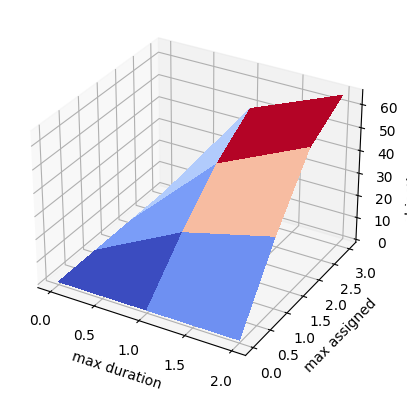

In [25]:
import numpy as np 

max_duration_max = int(max([model["max_duration"] for model in non_dominated_models]))
max_assigned_max = int(max([model["max_assigned"] for model in non_dominated_models]))

X = [i for i in range(max_duration_max)]
Y = [i for i in range(max_assigned_max)]
Z = np.zeros((max_duration_max, max_assigned_max))
for i in range(len(X)): 
    for j in range(len(Y)) : 
        Z[i][j] = get_objective_value(non_dominated_models, X[i], Y[j])
Y, X = np.meshgrid(Y, X)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("max duration")
ax.set_ylabel("max assigned")
ax.set_zlabel("objective function")

plt.show()